In [2]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [3]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import LSTM, Reshape, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import SensitivityAtSpecificity, AUC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import train_test_split
import numpy as np


In [4]:
from jupyterthemes import jtplot
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [5]:
os.listdir("C:\\Users\\athar\\OneDrive\\Desktop\\data\\archive\\colored_images")

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [8]:
os.listdir(os.path.join('C:\\Users\\athar\\OneDrive\\Desktop\\data\\archive\\train.csv', 'C:\\Users\\athar\\OneDrive\\Desktop\\data\\archive\\colored_images\\Mild'))

['0024cdab0c1e.png',
 '00cb6555d108.png',
 '0124dffecf29.png',
 '01b3aed3ed4c.png',
 '0369f3efe69b.png',
 '03e25101e8e8.png',
 '04ac765f91a1.png',
 '059bc89df7f4.png',
 '05a5183c92d0.png',
 '0684311afdfc.png',
 '06b71823f9cd.png',
 '07929d32b5b3.png',
 '07a1c7073982.png',
 '086d41d17da8.png',
 '09935d72892b.png',
 '0a3202889f4d.png',
 '0a61bddab956.png',
 '0ad7f631dedb.png',
 '0d310aba6373.png',
 '0dc031c94225.png',
 '0dce95217626.png',
 '0eb52045349f.png',
 '0f495d87656a.png',
 '0fb1053285cf.png',
 '101b9ebfc720.png',
 '107aea0d9289.png',
 '10f36b0239fb.png',
 '1116271db4ea.png',
 '111898ab463d.png',
 '12ce6a1a1f31.png',
 '12e3f5f2cb17.png',
 '13ab8db8c700.png',
 '15cc2aef772a.png',
 '172df1330a60.png',
 '17eff993386f.png',
 '18b06f56ab27.png',
 '194814669fee.png',
 '19722bff5a09.png',
 '19e350c7c83c.png',
 '1a03a7970337.png',
 '1b329a127307.png',
 '1bb0ddfe753a.png',
 '1c0cf251b426.png',
 '1c3a6b4449e9.png',
 '1d11794057ff.png',
 '1d674e2e32e0.png',
 '1df3e03a8f5f.png',
 '1e8a1fdee5b

In [9]:
# Check the number of images in the dataset
train = []
label = []


In [6]:
# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('C:\\Users\\athar\\OneDrive\\Desktop\\data\\archive\\colored_images'):
  train_class = os.listdir(os.path.join('C:\\Users\\athar\\OneDrive\\Desktop\\data\\archive\\colored_images', i))
  for j in train_class:
    img = os.path.join('C:\\Users\\athar\\OneDrive\\Desktop\\data\\archive\\colored_images', i, j)
    train.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(train)))

Number of train images : 3662 



In [10]:
train

[]

In [11]:
label

[]

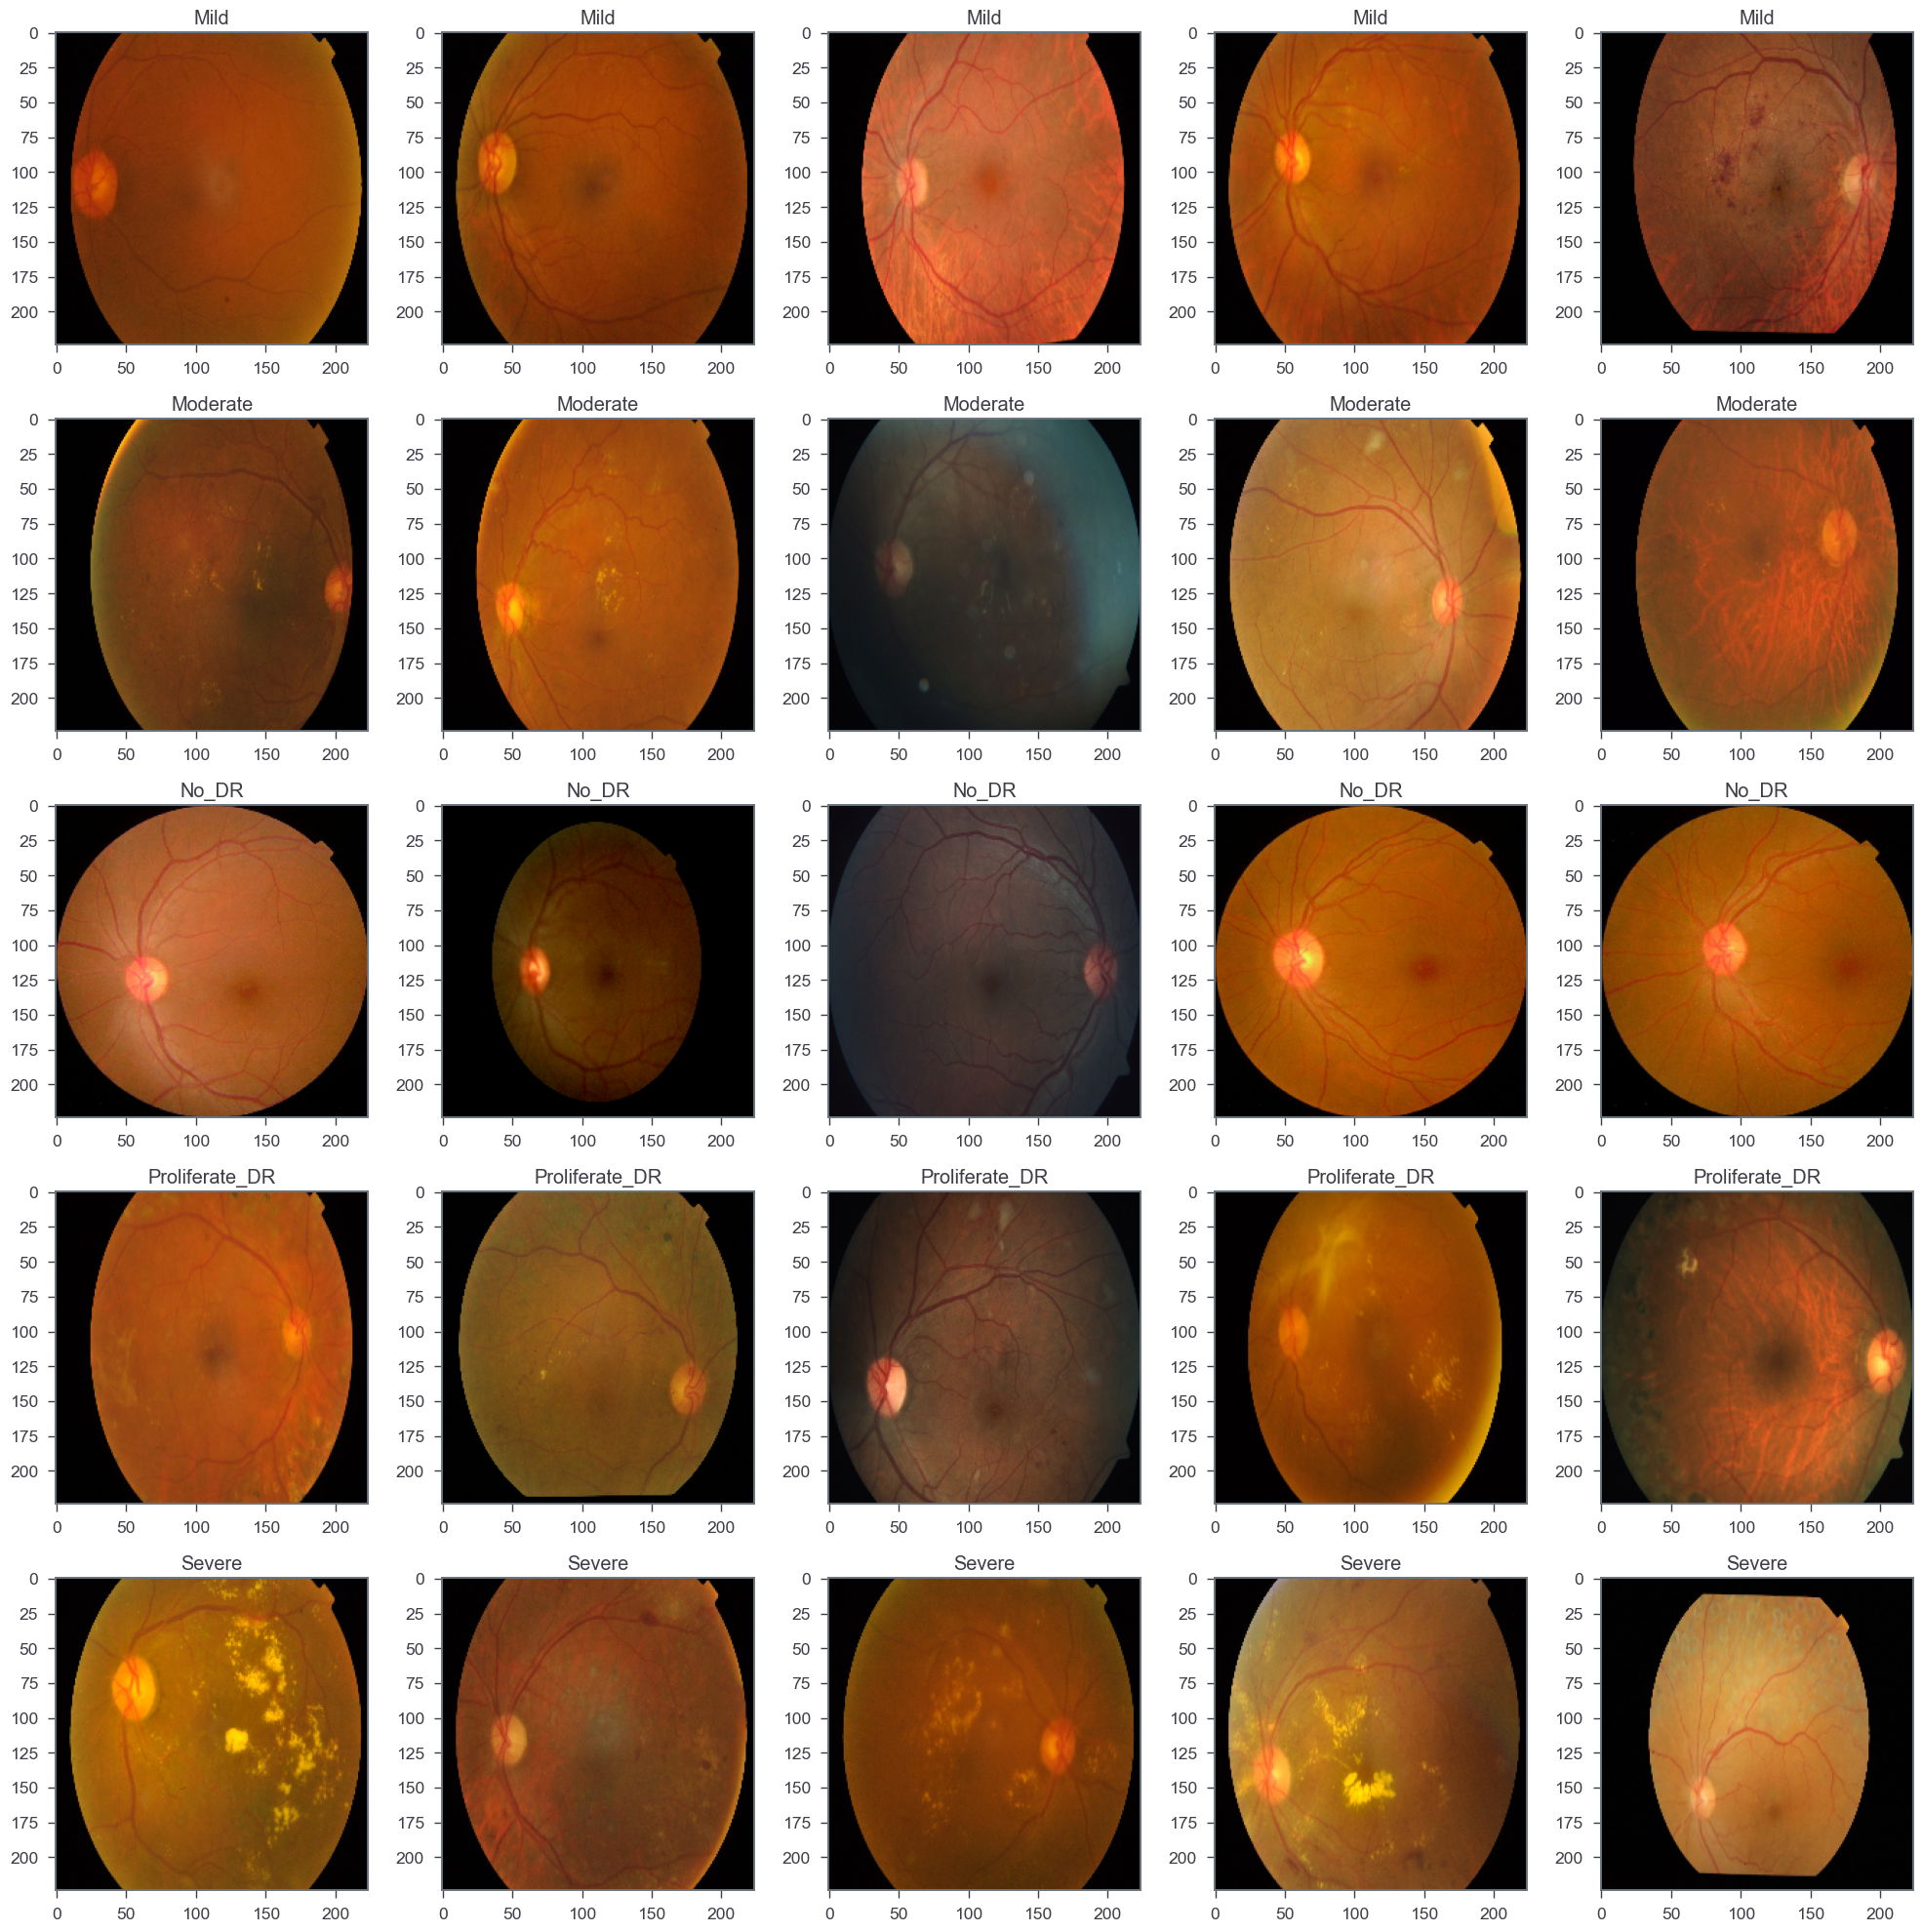

In [12]:
# Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir('C:\\Users\\athar\\OneDrive\\Desktop\\data\\archive\\colored_images'):
  # get the list of images in a given class
  train_class = os.listdir(os.path.join('C:\\Users\\athar\\OneDrive\\Desktop\\data\\archive\\colored_images',i))
  for j in range(5):
    img = os.path.join('C:\\Users\\athar\\OneDrive\\Desktop\\data\\archive\\colored_images', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()

In [13]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('C:\\Users\\athar\\OneDrive\\Desktop\\data\\archive\\colored_images'):
  train_class = os.listdir(os.path.join('C:\\Users\\athar\\OneDrive\\Desktop\\data\\archive\\colored_images', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in Mild = 370 

Number of images in Moderate = 999 

Number of images in No_DR = 1805 

Number of images in Proliferate_DR = 295 

Number of images in Severe = 193 



In [19]:
retina_df = pd.DataFrame({'Image': train,'Labels': label})
retina_df

Empty DataFrame
Columns: [Image, Labels]
Index: []

In [21]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.1)

ValueError: With n_samples=0, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)# Creating datagenerator for training, validation and test dataset.



In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

In [ ]:
# Create the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [16]:
# Add LSTM layer to the MobileNetV2 model
x = base_model.output
x = Reshape((-1, np.prod(base_model.output_shape[1:])))(x)
x = LSTM(128)(x)
predictions = Dense(5, activation='softmax')(x)

In [ ]:
# Create the hybrid model
hybrid_model = Model(inputs=base_model.input, outputs=predictions)


In [18]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, BatchNormalization, LSTM, ZeroPadding2D, Add, Activation, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import glorot_uniform
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import numpy as np

In [20]:
hybrid_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



In [21]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

#save the best model with lower validation lossmodel.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

checkpointer = ModelCheckpoint(filepath="hybrid.hdf5", verbose=1, save_best_only=True)

In [22]:
# history = hybrid_model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 50, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])
history = hybrid_model.fit(3train_generator, steps_per_epoch = train_generator.n // 32, epochs = 50, validation_data= validation_generator, validat0ion_steps= validation_generator.n // 32)

Epoch 1/50
77/77 [==============================] - 489s 6s/step - loss: 1.0019 - accuracy: 0.6497 - val_loss: 1.9202 - val_accuracy: 0.2644
Epoch 2/50
77/77 [==============================] - 430s 6s/step - loss: 0.8778 - accuracy: 0.6871 - val_loss: 1.6909 - val_accuracy: 0.2620
Epoch 3/50
77/77 [==============================] - 425s 6s/step - loss: 0.8366 - accuracy: 0.7042 - val_loss: 1.9846 - val_accuracy: 0.2668
Epoch 4/50
77/77 [==============================] - 421s 5s/step - loss: 0.8675 - accuracy: 0.6969 - val_loss: 1.7713 - val_accuracy: 0.3293
Epoch 5/50
77/77 [==============================] - 435s 6s/step - loss: 0.8178 - accuracy: 0.7107 - val_loss: 1.4499 - val_accuracy: 0.4062
Epoch 6/50
77/77 [==============================] - 516s 7s/step - loss: 0.8273 - accuracy: 0.7006 - val_loss: 1.1951 - val_accuracy: 0.5841
Epoch 7/50
77/77 [==============================] - 511s 7s/step - loss: 0.8590 - accuracy: 0.6859 - val_loss: 0.9193 - val_accuracy: 0.6442
Epoch 8/50
77

In [ ]:
model.save('hybrid.hdf5')

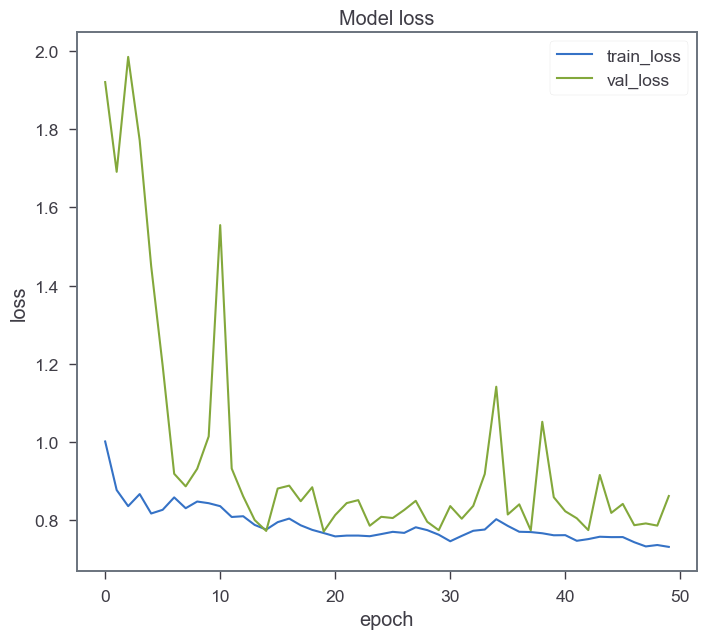

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [42]:
hybrid_model.load_weights("hybrid.hdf5")

In [43]:
# Evaluate the performance of the model
evaluate = hybrid_model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

22/22 [==============================] - 144s 6s/step - loss: 0.7500 - accuracy: 0.7315
Accuracy Test : 0.7315340638160706


In [44]:
labels = {0: 'No_DR', 1: 'Mild', 2: 'Moderate', 3:'Severe', 4: 'Proliferate_DR'}

In [45]:
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  #code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  #resizing the image to (256,256)
  img = img.resize((256,256))
  #appending image to the image list
  image.append(img)
  #converting image to array
  img = np.asarray(img, dtype= np.float32)
  #normalizing the image
  img = img / 255
  #reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  #making prediction of the model
  predict = hybrid_model.predict(img)
  #getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  #appending the predicted class to the list
  prediction.append(labels[predict])
  #appending original class to the list
  original.append(test['Labels'].tolist()[item])

1/1 [==============================] - 1s 641ms/step


In [46]:
#Getting the test accuracy 
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.1145975443383356


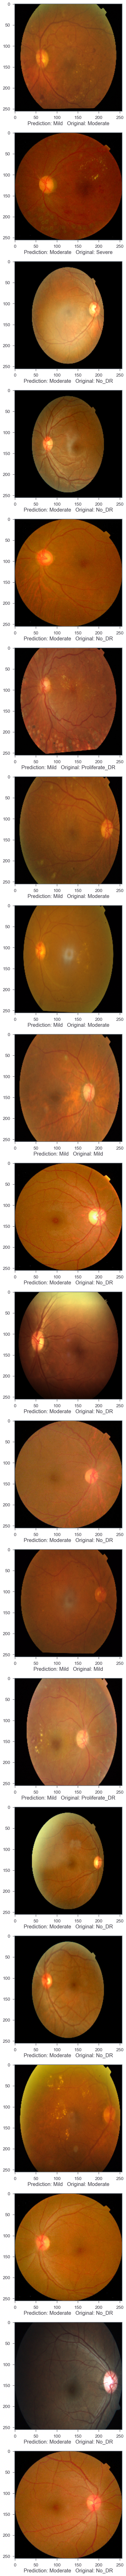

In [47]:







# Visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

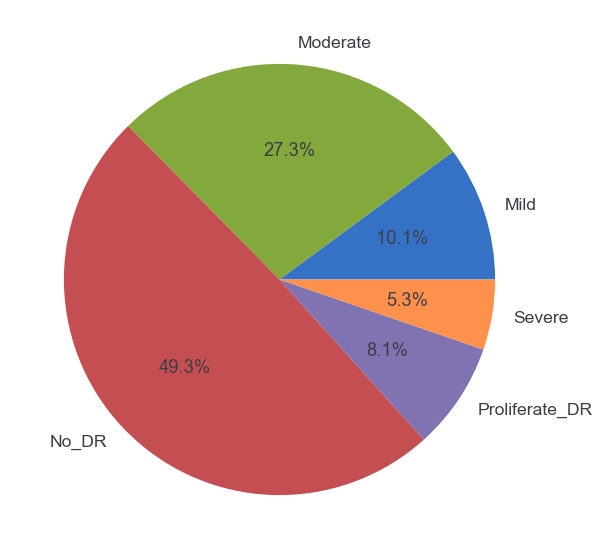

In [48]:
No_images_per_class
Class_name
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels = Class_name, autopct = '%1.1f%%')
plt.show

In [49]:
tf.keras.preprocessing.image.ImageDataGenerator(
      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      zca_epsilon=1e-06,
      rotation_range=0,
      width_shift_range=0.0,
      height_shift_range=0.0,
      brightness_range=None,
      shear_range=0.0,
      zoom_range=0.0,
      channel_shift_range=0.0,
      fill_mode="nearest",
      cval=0.0,
      horizontal_flip=False,
      vertical_flip=False,
      rescale=None,
      preprocessing_function=None,
      data_format=None,
      validation_split=0.3,
      dtype=None)

In [50]:
# Print out the classification report
print(classification_report(np.asarray(original), np.asarray(prediction)))


                precision    recall  f1-score   support

          Mild       0.19      0.93      0.32        70
      Moderate       0.05      0.09      0.06       200
         No_DR       0.33      0.00      0.01       371
Proliferate_DR       0.00      0.00      0.00        60
        Severe       0.00      0.00      0.00        32

      accuracy                           0.11       733
     macro avg       0.11      0.20      0.08       733
  weighted avg       0.20      0.11      0.05       733



C:\Users\athar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\athar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\athar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion_matrix')

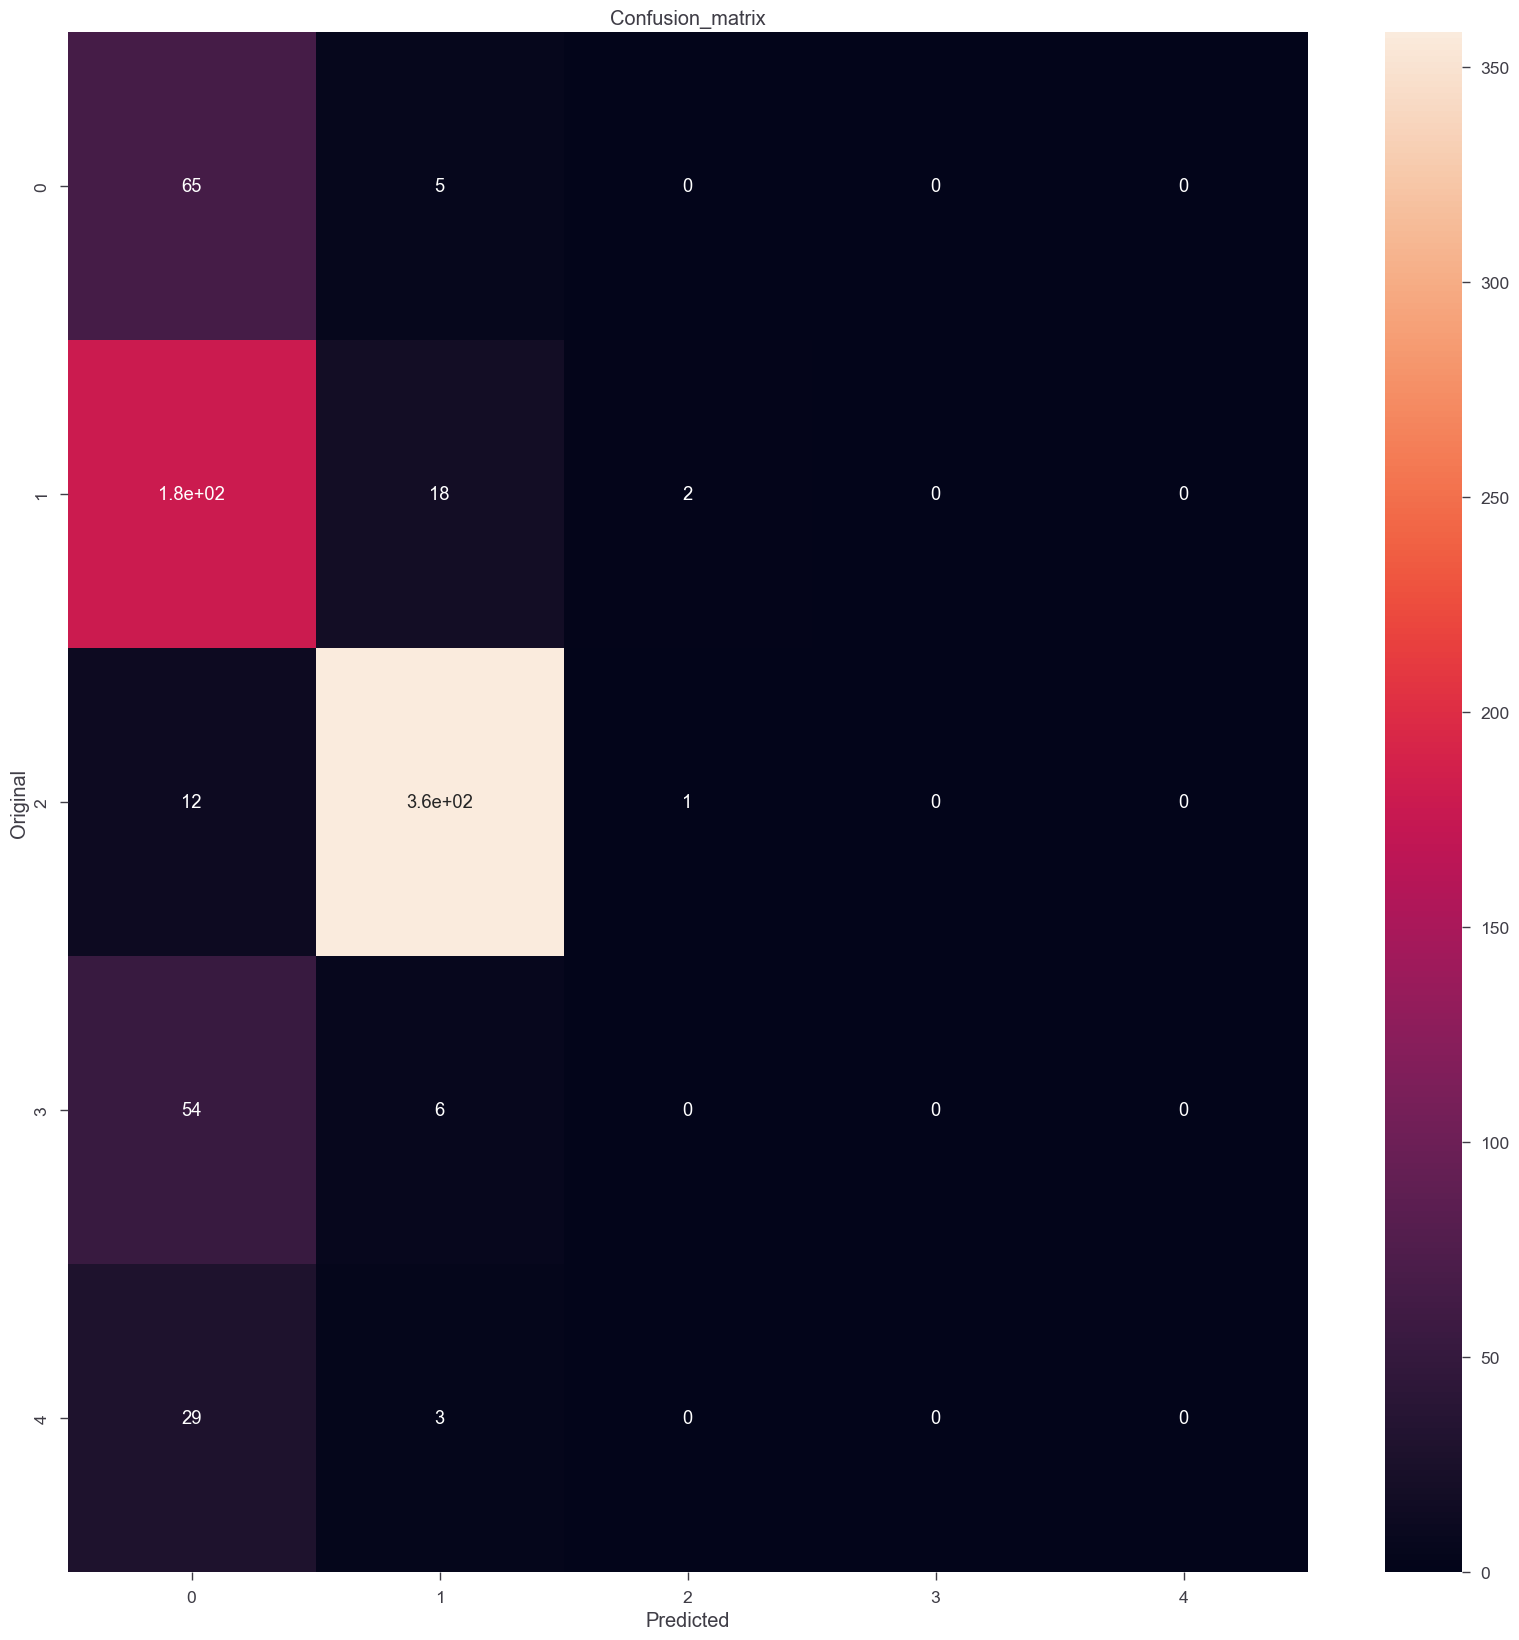

In [51]:
# plot the confusion matrix
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')


In [52]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Assuming you have a list of labels, for example:
label1 = label  # Replace this with your actual labels

# Convert string labels to integer indices
class_mapping = {label: idx for idx, label in enumerate(np.unique(label1))}
label_indices = [class_mapping[label] for label in label1]

# Convert labels to one-hot encoding
num_classes = len(np.unique(label1))
y_test = to_categorical(label_indices, num_classes=num_classes)

print(y_test)


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [53]:
y_pred = hybrid_model.predict(test_generator)  # X_test should contain your test data
y_true = np.argmax(y_test, axis=1)  # y_test should contain true labels in one-hot encoded format


23/23 [==============================] - 166s 7s/step


In [54]:
from sklearn.metrics import confusion_matrix

# Assuming y_true is your true labels and y_pred is your predicted probabilities or class predictions
# If y_pred is probabilities, convert it to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)

# Ensure that y_true and y_pred have the same length
y_true = y_true[:len(y_pred_classes)]

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Calculate sensitivity and specificity
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


Sensitivity: 1.0000
Specificity: 0.0058


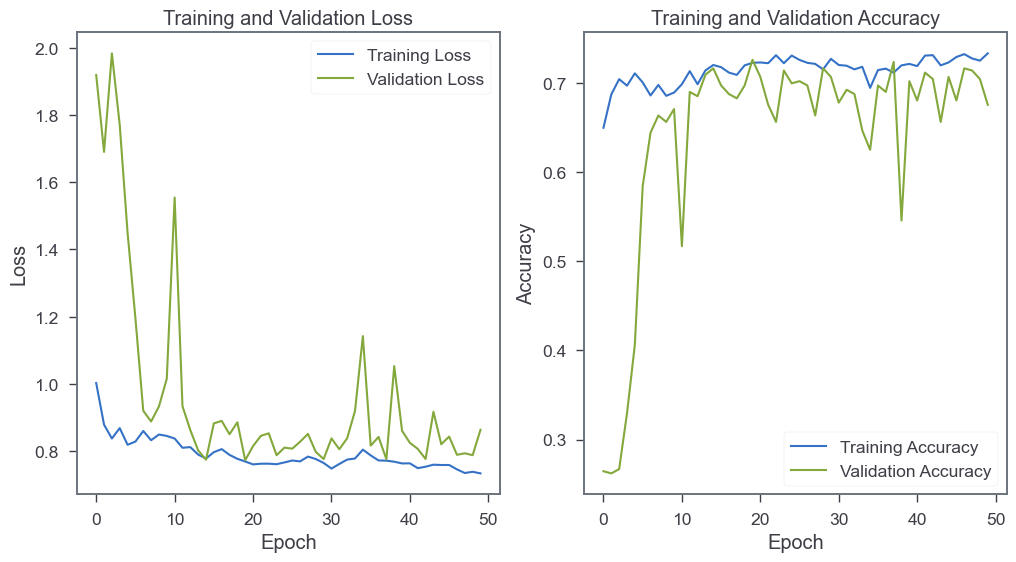

In [55]:
# Extract training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Training Losses: [1.0018962621688843, 0.8777689933776855, 0.8365957140922546, 0.867464542388916, 0.8178176879882812, 0.8273214101791382, 0.8589979410171509, 0.8313441872596741, 0.8484314680099487, 0.8441916108131409, 0.8365551233291626, 0.808952808380127, 0.8108506798744202, 0.7886300683021545, 0.7767585515975952, 0.795782744884491, 0.8048703074455261, 0.7876904606819153, 0.7760059237480164, 0.7678869962692261, 0.7593460083007812, 0.7613792419433594, 0.7614362835884094, 0.7598121762275696, 0.7652467489242554, 0.7709858417510986, 0.7682921290397644, 0.7826445698738098, 0.7753564119338989, 0.7636184096336365, 0.7469196319580078, 0.7606537342071533, 0.7736804485321045, 0.7768771052360535, 0.8032813668251038, 0.7862064242362976, 0.7711570262908936, 0.7704167366027832, 0.7673492431640625, 0.7622114419937134, 0.7624943256378174, 0.7480887174606323, 0.752424418926239, 0.7584629058837891, 0.7574741244316101, 0.7575869560241699, 0.7444409728050232, 0.7337045669555664, 0.7373169660568237, 0.7325

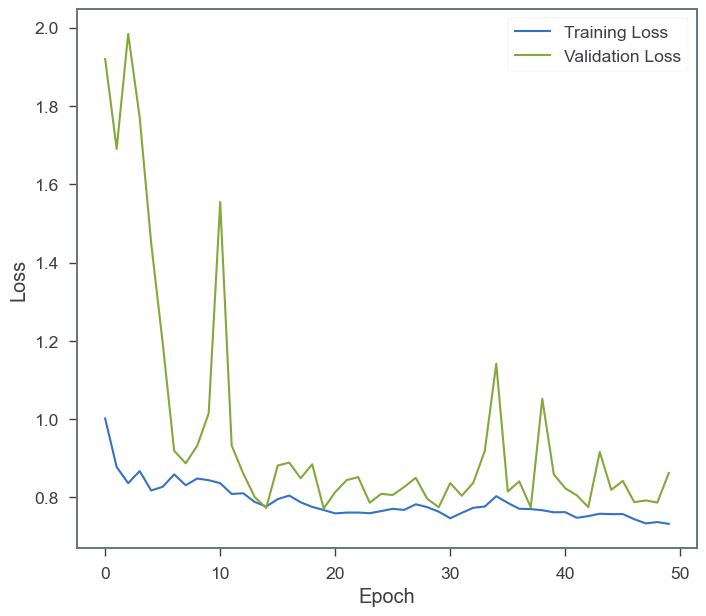

In [57]:


# Access training and validation losses from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Print or plot the losses
print("Training Losses:", training_loss)
print("Validation Losses:", validation_loss)

# Plot the losses over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Training Losses: [1.0018962621688843, 0.8777689933776855, 0.8365957140922546, 0.867464542388916, 0.8178176879882812, 0.8273214101791382, 0.8589979410171509, 0.8313441872596741, 0.8484314680099487, 0.8441916108131409, 0.8365551233291626, 0.808952808380127, 0.8108506798744202, 0.7886300683021545, 0.7767585515975952, 0.795782744884491, 0.8048703074455261, 0.7876904606819153, 0.7760059237480164, 0.7678869962692261, 0.7593460083007812, 0.7613792419433594, 0.7614362835884094, 0.7598121762275696, 0.7652467489242554, 0.7709858417510986, 0.7682921290397644, 0.7826445698738098, 0.7753564119338989, 0.7636184096336365, 0.7469196319580078, 0.7606537342071533, 0.7736804485321045, 0.7768771052360535, 0.8032813668251038, 0.7862064242362976, 0.7711570262908936, 0.7704167366027832, 0.7673492431640625, 0.7622114419937134, 0.7624943256378174, 0.7480887174606323, 0.752424418926239, 0.7584629058837891, 0.7574741244316101, 0.7575869560241699, 0.7444409728050232, 0.7337045669555664, 0.7373169660568237, 0.7325

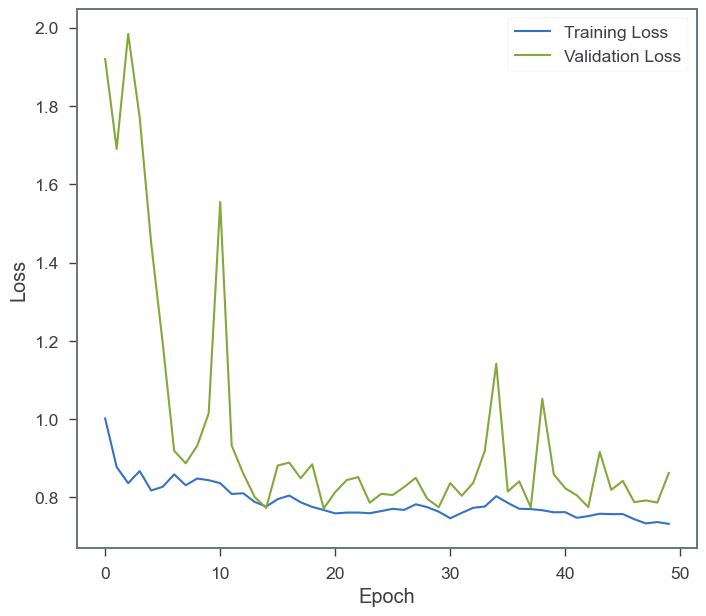

In [58]:
# Access training and validation losses from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Print or plot the losses
print("Training Losses:", training_loss)
print("Validation Losses:", validation_loss)

# Plot the losses over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()